<h1 style="text-align: center;">Pengenalan Pustaka Pandas</h1>

# Persiapan

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 120

In [4]:
mpl.style.use("ggplot")

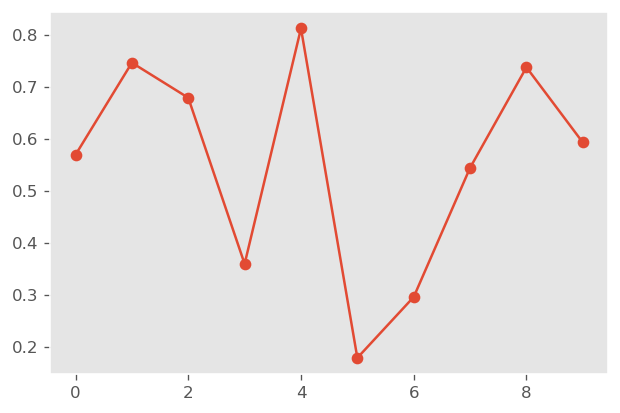

In [5]:
plt.clf()
plt.plot(np.random.rand(10), marker="o")
plt.grid()

In [6]:
import pandas as pd

# Objek dasar Pandas

Terdapat tiga objek dasar Pandas yaitu:
- `Series`
- `DataFrame`
- `Index`

## Objek `Series` pada Pandas

`Series` adalah array 1d dari suatu data dengan indeks.

`Series` dapat dibuat dari suatu `list`:

In [7]:
s1 = pd.Series([0.5, 0.6, 0.4, 0.8, 0.76])
s1

0    0.50
1    0.60
2    0.40
3    0.80
4    0.76
dtype: float64

In [8]:
s2 = pd.Series(np.random.rand(5))
s2

0    0.256837
1    0.318179
2    0.552482
3    0.286511
4    0.466740
dtype: float64

`Series` terdiri dari barisan (*sequence*) nilai dan indeks yang dapat diakses dengan atribut `values` dan `index`.

Atribut `values` adalah objek array NumPy:

In [9]:
s1.values

array([0.5 , 0.6 , 0.4 , 0.8 , 0.76])

Sedangkan atribut `index` objek yang mirip array dengan tipe `pd.Index`.

In [10]:
s1.index

RangeIndex(start=0, stop=5, step=1)

In [11]:
type(s1.index)

pandas.core.indexes.range.RangeIndex

### `Series` sebagai generalisasi dari array `NumPy`

Data pada `Series` dapat diakses seperti pada array atau `list` dengan menggunakan operator kurung siku.

In [12]:
s1[2]

0.4

In [13]:
s2[1:3]

1    0.318179
2    0.552482
dtype: float64

Series memiliki banyak kemiripan dengan array NumPy. Perbedaannya adalah indeks pada array NumPy didefinisikan secara *implisit* sedangkan pada `Series` indeks didefinisikan secara *eksplisit* didefinisikan.

Indeks pada `Series` tidak harus berupa integer.

In [14]:
s1 = pd.Series([0.5, 0.6, 0.4, 0.8, 0.76], index=["a", "b", "c", "d", "e"])
s1

a    0.50
b    0.60
c    0.40
d    0.80
e    0.76
dtype: float64

In [15]:
s1["a"]

0.5

In [16]:
s1[["b", "c"]]

b    0.6
c    0.4
dtype: float64

Indeks pada `Series` tidak harus berurutan (untuk kasus indeks integer):

In [17]:
s1 = pd.Series([0.5, 0.6, 0.4, 0.8, 0.76], index=[3, 5, 7, 1, 4])
s1

3    0.50
5    0.60
7    0.40
1    0.80
4    0.76
dtype: float64

### `Series` sebagai spesialisasi dari `dict`

In [18]:
populasi_dict = {
    "Banten" : 12448200,
    "DKI Jakarta" : 10374200,
    "Jawa Barat" : 48037600,
    "Jawa Tengah" : 34257900,
    "Jawa Timur" : 39293000,
}
populasi = pd.Series(populasi_dict)
populasi

Banten         12448200
DKI Jakarta    10374200
Jawa Barat     48037600
Jawa Tengah    34257900
Jawa Timur     39293000
dtype: int64

In [19]:
populasi["DKI Jakarta"]

10374200

In [20]:
populasi["DKI Jakarta":"Jawa Timur"]

DKI Jakarta    10374200
Jawa Barat     48037600
Jawa Tengah    34257900
Jawa Timur     39293000
dtype: int64

### Mengkonstruksi objek `Series`

Sintaks umum:
```
pd.Series(data, index=index)
```
di mana `index` adalah argumen opsional dan data
dapat berupa banyak objek.

Contoh `data` berupa list atau NumPy array dan `index` default berupa urutan integer:

In [21]:
pd.Series([2,4,5])

0    2
1    4
2    5
dtype: int64

Data skalar, `index` diberikan:

In [22]:
pd.Series(123, index=[100, 200, 300])

100    123
200    123
300    123
dtype: int64

`data` berupa `dict`, `index` diambil dari kunci `dict`:

In [23]:
pd.Series( {2: "Jojo", 1: "Joyo", 3: "Joko"} )

2    Jojo
1    Joyo
3    Joko
dtype: object

Hanya indeks tertentu yang digunakan:

In [24]:
pd.Series( {2: "Jojo", 1: "Joyo", 3: "Joko"}, index=[3,2] )

3    Joko
2    Jojo
dtype: object

In [25]:
pd.Series( {2: "Jojo", 1: "Joyo", 3: "Joko"}, index=[2,3] )

2    Jojo
3    Joko
dtype: object

## Objek `DataFrame`

### `DataFrame` sebagai generalisasi array `NumPy`

Sebagaimana `Series` dapat dianggap sebagai generalisasi dari array 1d `NumPy`, `DataFrame` dapat dianggap sebagai generalisasi dari array 2d `NumPy` dengan sistem indeks yang lebih fleksibel.

`DataFrame` dapat dibuat dari beberapa `Series` yang memiliki indeks bersama.

In [26]:
luas_dict = {
    "Banten" : 9662.92,
    "DKI Jakarta" : 664.01,
    "Jawa Barat" : 35377.76,
    "Jawa Tengah" : 32800.69,
    "Jawa Timur" : 47799.75
}
luas = pd.Series(luas_dict)
luas

Banten          9662.92
DKI Jakarta      664.01
Jawa Barat     35377.76
Jawa Tengah    32800.69
Jawa Timur     47799.75
dtype: float64

Buat objek `DataFrame`:

In [27]:
provinsi = pd.DataFrame({"populasi" : populasi, "luas" : luas})
provinsi

,populasi,luas
Banten,12448200,9662.92
DKI Jakarta,10374200,664.01
Jawa Barat,48037600,35377.76
Jawa Tengah,34257900,32800.69
Jawa Timur,39293000,47799.75


Objek `DataFrame` memiliki atribut `index` dan `columns` yang dapat digunakan untuk mengakses indeks "baris" dan "kolom":

In [28]:
provinsi.index

Index(['Banten', 'DKI Jakarta', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur'], dtype='object')

In [29]:
provinsi.columns

Index(['populasi', 'luas'], dtype='object')

### DataFrame sebagai dict khusus

Suatu objek `dict` memetakan sebuah kunci ke suatu nilai sedangkan objek `DataFrame` memetakan nama kolom ke suatu objek `Series`.

In [30]:
provinsi["luas"]

Banten          9662.92
DKI Jakarta      664.01
Jawa Barat     35377.76
Jawa Tengah    32800.69
Jawa Timur     47799.75
Name: luas, dtype: float64

In [31]:
type(provinsi["luas"])

pandas.core.series.Series

Contoh mengakses data pada `DataFrame`

In [32]:
provinsi["luas"]["Banten"]

9662.92

### Membuat objek `DataFrame`

Objek `DataFrame` dapat diakses dari satu atau lebih objek `Series`. Contoh membuat objek `DataFrame` dari satu objek `Series`:

In [33]:
pd.DataFrame(provinsi["luas"])

,luas
Banten,9662.92
DKI Jakarta,664.01
Jawa Barat,35377.76
Jawa Tengah,32800.69
Jawa Timur,47799.75


Objek `DataFrame` dapat dikonstruksi dari `list` dari `dict`:

In [39]:
data = [{"a": i, "b": 2 * i} for i in range(3)]
print(data)
pd.DataFrame(data)

[{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'b': 4}]


,a,b
0,0,0
1,1,2
2,2,4


Jika beberapa kunci pada `dict` tidak ada, Pandas akan mengisinya dengan `NaN`:

In [40]:
list_of_dict = [{"a": 1, "b": 2}, {"b": 3, "c": 4}]
print(list_of_dict)
pd.DataFrame(list_of_dict)

[{'a': 1, 'b': 2}, {'b': 3, 'c': 4}]


,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


Contoh membuat objek `DataFrame` dari `dict` dari `Series`

In [41]:
pd.DataFrame({"populasi": populasi, "luas": luas})

,populasi,luas
Banten,12448200,9662.92
DKI Jakarta,10374200,664.01
Jawa Barat,48037600,35377.76
Jawa Tengah,34257900,32800.69
Jawa Timur,39293000,47799.75


Objek `DataFrame` dapat dibuat dari array 2d `NumPy` dengan nama indeks dan nama kolom yang diberikan.

In [42]:
arr = np.random.rand(3,2)
pd.DataFrame(arr, columns=["kolom 1", "kolom 2"], index=["a", "b", "c"])

,kolom 1,kolom 2
a,0.974290,0.258929
b,0.454017,0.259447
c,0.232638,0.005131


## Objek `Index`

`Index` dapat dianggap sebagai array immutable atau sebagai multi-himpunan (dapat berisi nilai yang berulang) berurut.

In [43]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

`Index` sangat mirip dengan array 1d `NumPy`:

In [44]:
ind[1]

3

In [45]:
ind[::-1]

Int64Index([11, 7, 5, 3, 2], dtype='int64')

Beberapa atribut dari `Index`:

In [46]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


`Index` bersifat immutable:

```ipython
ind[1] = 99
```

```text
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-47-0b51fd5d9831> in <module>
----> 1 ind[1] = 99

~/miniconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py in __setitem__(self, key, value)
   3936 
   3937     def __setitem__(self, key, value):
-> 3938         raise TypeError("Index does not support mutable operations")
   3939 
   3940     def __getitem__(self, key):

TypeError: Index does not support mutable operations

```


`Index` merupakan generalisasi dari `set`:

In [48]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])
indA, indB

(Int64Index([1, 3, 5, 7, 9], dtype='int64'),
 Int64Index([2, 3, 5, 7, 11], dtype='int64'))

In [49]:
indA & indB # irisan (intersection)

Int64Index([3, 5, 7], dtype='int64')

In [50]:
indA | indB # gabungan (union)

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [54]:
indA ^ indB # xor?

Int64Index([1, 2, 9, 11], dtype='int64')

# Seleksi Data

## Seleksi data pada `Series`

In [57]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=["a", "b", "c", "d"])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [58]:
data["a"]

0.25

In [59]:
"b" in data

True

In [60]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [65]:
f = data.items()
print(type(f))
list(f)

<class 'zip'>


[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

Menambahkan data:

In [66]:
data["e"] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [69]:
data["a":"c"]

a    0.25
b    0.50
c    0.75
dtype: float64

In [71]:
data[::-1]

e    1.25
d    1.00
c    0.75
b    0.50
a    0.25
dtype: float64

In [72]:
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [73]:
data[["a", "e"]]

a    0.25
e    1.25
dtype: float64

### Indexer

In [74]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [75]:
data[1]

'a'

In [76]:
data[1:3]

3    b
5    c
dtype: object

Explicit indexing: menggunakan atribut `loc`:

In [77]:
data.loc[1]

'a'

In [79]:
data.loc[1:3]

1    a
3    b
dtype: object

In [82]:
data.iloc[1:3]

3    b
5    c
dtype: object

In [83]:
data[1:3]

3    b
5    c
dtype: object

## Seleksi data pada `DataFrame`

In [85]:
populasi = pd.Series({
    "Banten" : 12448200,
    "DKI Jakarta" : 10374200,
    "Jawa Barat" : 48037600,
    "Jawa Tengah" : 34257900,
    "Jawa Timur" : 39293000,
})
luas = pd.Series({
    "Banten" : 9662.92,
    "DKI Jakarta" : 664.01,
    "Jawa Barat" : 35377.76,
    "Jawa Tengah" : 32800.69,
    "Jawa Timur" : 47799.75
})
data = pd.DataFrame({"luas" : luas, "populasi" : populasi})
data

,luas,populasi
Banten,9662.92,12448200
DKI Jakarta,664.01,10374200
Jawa Barat,35377.76,48037600
Jawa Tengah,32800.69,34257900
Jawa Timur,47799.75,39293000


In [86]:
data["luas"]

Banten          9662.92
DKI Jakarta      664.01
Jawa Barat     35377.76
Jawa Tengah    32800.69
Jawa Timur     47799.75
Name: luas, dtype: float64

In [87]:
data.luas

Banten          9662.92
DKI Jakarta      664.01
Jawa Barat     35377.76
Jawa Tengah    32800.69
Jawa Timur     47799.75
Name: luas, dtype: float64

In [88]:
data.luas is data["luas"]

True

In [90]:
data.index

Index(['Banten', 'DKI Jakarta', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur'], dtype='object')

Menambahkan data:

In [107]:
data["kepadatan"] = data["populasi"]/data["luas"]
data

,luas,populasi,kepadatan
Banten,9662.92,12448200,1288.244133
DKI Jakarta,664.01,10374200,15623.559886
Jawa Barat,35377.76,48037600,1357.847416
Jawa Tengah,32800.69,34257900,1044.426200
Jawa Timur,47799.75,39293000,822.033588


In [92]:
for k, v in data["luas"].items():
    print(k, " ", v)

Banten   9662.92
DKI Jakarta   664.01
Jawa Barat   35377.76
Jawa Tengah   32800.69
Jawa Timur   47799.75


### DataFrame sebagai array 2d

In [93]:
data.values

array([[9.662920e+03, 1.244820e+07],
       [6.640100e+02, 1.037420e+07],
       [3.537776e+04, 4.803760e+07],
       [3.280069e+04, 3.425790e+07],
       [4.779975e+04, 3.929300e+07]])

In [94]:
data.values[:,1]

array([12448200., 10374200., 48037600., 34257900., 39293000.])

In [95]:
data.values[:,0]

array([ 9662.92,   664.01, 35377.76, 32800.69, 47799.75])

In [97]:
data.T

,Banten,DKI Jakarta,Jawa Barat,Jawa Tengah,Jawa Timur
luas,9662.92,664.01,35377.76,32800.69,47799.75
populasi,12448200.00,10374200.00,48037600.00,34257900.00,39293000.00


In [98]:
data.values[0]

array([9.66292e+03, 1.24482e+07])

In [100]:
data["populasi"]

Banten         12448200
DKI Jakarta    10374200
Jawa Barat     48037600
Jawa Tengah    34257900
Jawa Timur     39293000
Name: populasi, dtype: int64

In [101]:
data.loc["Banten":"Jawa Tengah"]

,luas,populasi
Banten,9662.92,12448200
DKI Jakarta,664.01,10374200
Jawa Barat,35377.76,48037600
Jawa Tengah,32800.69,34257900


In [104]:
data.iloc[1:3,1:2]

,populasi
DKI Jakarta,10374200
Jawa Barat,48037600


ix: DeprecatioWarning

In [105]:
data.ix[:3]

/home/efefer/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,luas,populasi
Banten,9662.92,12448200
DKI Jakarta,664.01,10374200
Jawa Barat,35377.76,48037600


In [110]:
data.kepadatan > 1200

Banten          True
DKI Jakarta     True
Jawa Barat      True
Jawa Tengah     True
Jawa Timur     False
Name: kepadatan, dtype: bool

In [112]:
data[data.kepadatan > 1200]

,luas,populasi,kepadatan
Banten,9662.92,12448200,1288.244133
DKI Jakarta,664.01,10374200,15623.559886
Jawa Barat,35377.76,48037600,1357.847416
